# Projet Supply Chain - DS23

## 1. Rapport d'exploration, de data visualisation et de pre-processing des données

### 1.1 Collecte des données

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#### a) Jeu de données transmis par Datascientest

In [94]:
df_ds=pd.read_csv('reviews_trust.csv')

df_ds['date']=df_ds['date'].str.slice(0, 10) 
df_ds['date_commande']=df_ds['date_commande'].str.slice(0, 10) 
# j'enlève le fuseau horaire afin que le format soit identique au format date de mes autres dataframe

df_ds.head()

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


#### b) Jeu de données scrappé sur le site Trustpilot - company Uniqlo

In [4]:
from bs4 import BeautifulSoup as bs
import requests

In [7]:
url_uniqlo='https://fr.trustpilot.com/review/www.uniqlo.com'
Commentaire, star, date, client, reponse, source, company, maj, date_commande =[], [], [], [], [], [], [], [], []


for page_number in range(1, 10): #au delà de la page 10, la boucle ne fonctionne plus car manque balise
    url_uni=f"{url_uniqlo}?page={page_number}"
    page_uni=requests.get(url_uni, verify=False)
    soup_uniqlo=bs(page_uni.content, 'lxml')

    for donnees in soup_uniqlo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :
      
        comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
        Commentaire.append(comments) # OK
    
        notes=donnees.find('img')
        star.append(notes['alt']) # OK
    
        for time in soup_uniqlo.select('time'):
            date_com=time.get('datetime')
            date.append(date_com[:10])  # OK
     
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)  # OK
    
        # pas de réponse du service client sur Uniqlo
        # donc pas de maj sur Uniqlo
        
        source.append('TrustPilot')
        company.append('Uniqlo')
        
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])  # OK
    
    
print(Commentaire)
print(star)
print(date)
print(client)
#print(reponse)
#print(maj)
print(source)
print(company)
print(date_commande)    


C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

['Nous sommes allées dans le magasin Uniqlo de Passy et la vendeuse nous a demandé d’aller au magasin Uniqlo de La Défense pour échanger un article.Or sur le ticket , est précisé que les échanges peuvent être fait dans n’importe quel magasin.', "Je recommande fortement, j'ai acheté plusieurs vêtements en lin. Tous excellent. Légèrement cher mais tout de même qualitatif, contrairement aux autres marques de cette gamme.", 'Grand magasin avec énormément de choix la vie de nombreux vendeurs sur quatre étages ainsi que présents en cas de problème sur des vêtements.Vraiment beau magasin !', 'Article jamais reçu, cela fait plus de 15 jours que j\'aurais dû être livré. Le SAV se contente de me répondre que "le colis est supposé livré" et ne propose aucune solution. A fuir absolument', 'Très grand magasin, les vêtements sont très bien rangé et très bien disposé pour afin de faciliter la vue. Les vendeurs sont très professionnels et compréhensif malheureusement il y en a pas beaucoup.Je recomman

In [106]:
import pandas as pd

df_uniqlo = pd.DataFrame(list(zip(Commentaire, star, date, client, source, company, date_commande)),
               columns =['Commentaire', 'star', 'date', 'client', 'source', 'company', 'date_commande'])
# sans colonne 'reponse', 'maj', 'date_commande'

display(df_uniqlo.head())


,Commentaire,star,date,client,source,company,date_commande
0,Nous sommes allées dans le magasin Uniqlo de P...,Noté 1 sur 5 étoiles,2023-06-29,ELLE,TrustPilot,Uniqlo,29 juin 2023
1,"Je recommande fortement, j'ai acheté plusieurs...",,2023-06-29,Lenny Tridat,TrustPilot,Uniqlo,22 juin 2023
2,Grand magasin avec énormément de choix la vie ...,,2023-06-27,Carolina,TrustPilot,Uniqlo,27 juin 2023
3,"Article jamais reçu, cela fait plus de 15 jour...",Noté 1 sur 5 étoiles,2023-06-21,Antoine,TrustPilot,Uniqlo,21 juin 2023
4,"Très grand magasin, les vêtements sont très bi...",,2023-06-20,Martine,TrustPilot,Uniqlo,20 juin 2023


#### c) Jeu de données scrappé sur le site Trustpilot - company Spartoo.com

In [43]:
url_spartoo='https://fr.trustpilot.com/review/www.spartoo.com'
Commentaire_Sp, star_Sp, date_Sp, client_Sp, reponse_Sp, source_Sp, company_Sp, maj_Sp, date_commande_Sp =[], [], [], [], [], [], [], [], []


for page_number in range(1, 10): # essai
    url_spar=f"{url_spartoo}?page={page_number}"
    page_uni=requests.get(url_spar, verify=True)
    soup_spartoo=bs(page_uni.content, 'lxml')

    for donnees in soup_spartoo.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        """comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
        if comments is not None:
            comm = comments.text.strip()
            Commentaire_Sp.append(comm)
        else:
            Commentaire_Sp.append("NaN") """ # message d'erreur 'str' object has no attribute 'text'
        
        notes=donnees.find('img')
        star_Sp.append(notes['alt']) # OK
    
        for time in soup_spartoo.select('time'):
            date_com=time.get('datetime')
            date_Sp.append(date_com[:10])  # OK
     
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client_Sp.append(personne)  # OK
        
        reponseClients=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX')    
        if reponseClients is not None:
            reponse = reponseClients.text.strip()
            reponse_Sp.append(reponse)
        else:
            reponse_Sp.append("NaN")  
           
    
        # donc pas de maj sur Spartoo
        
        source_Sp.append('TrustPilot')
        company_Sp.append('Spartoo')
        
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande_Sp.append(date_cde[22:])  # OK
    
    
print(Commentaire_Sp)
print(star_Sp)
print(date_Sp)
print(client_Sp)
print(reponse_Sp)
#print(maj)
print(source_Sp)
print(company_Sp)
print(date_commande_Sp) 


[]
['Noté 3 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', 'Noté 1 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 3 sur 5 étoiles', '', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', 'Noté 3 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 4 sur 5 étoiles', '', 'Noté 5 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 3 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 5 sur 5 étoiles', '', '', 'Noté 1 sur 5 étoiles', '', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 5 sur 5 étoiles', '', 

In [53]:
df_spartoo = pd.DataFrame(list(zip(star_Sp, date_Sp, client_Sp, reponse_Sp, source_Sp, company_Sp, date_commande_Sp)),
               columns =['star', 'date', 'client', 'reponse', 'source', 'company', 'date_commande'])
# sans colonne 'maj'

display(df_spartoo.head())


,star,date,client,reponse,source,company,date_commande
0,Noté 3 sur 5 étoiles,2023-07-02,Yvette ghesquière,NaN,TrustPilot,Spartoo,28 juin 2023
1,Noté 1 sur 5 étoiles,2023-07-01,brvl,NaN,TrustPilot,Spartoo,15 mai 2023
2,,2023-07-02,bernard,NaN,TrustPilot,Spartoo,01 juillet 2023
3,Noté 1 sur 5 étoiles,2023-07-01,Sandra,NaN,TrustPilot,Spartoo,25 avril 2023
4,Noté 5 sur 5 étoiles,2023-07-02,Marjorie,NaN,TrustPilot,Spartoo,24 juin 2023


#### d) Jeu de données scrappé sur le site Trustpilot - company Vinted

In [47]:
url_vinted='https://fr.trustpilot.com/review/vinted.fr'
Commentaire_Vin, star_Vin, date_Vin, client_Vin, reponse_Vin, source_Vin, company_Vin, maj_Vin, date_commande_Vin =[], [], [], [], [], [], [], [], []

for page_number in range(1, 10): # essai
    url_v=f"{url_vinted}?page={page_number}"
    page_uni=requests.get(url_v, verify=True)
    soup_vinted=bs(page_uni.content, 'lxml')

    for donnees in soup_vinted.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        """comments=donnees.find('p', class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn').text.strip()
        if comments is not None:
            comm = comments.text.strip()
            Commentaire_Vin.append(comm)
        else:
            Commentaire_Vin.append("NaN")  # message d'erreur m'indiquant qu'un str n'a pas de .text alors que fonctionne dans reponse ?
        """
        
        notes=donnees.find('img')
        star_Vin.append(notes['alt']) # OK
    
        for time in soup_vinted.select('time'):
            date_com=time.get('datetime')
            date_Vin.append(date_com[:10])  # OK
     
        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client_Vin.append(personne)  # OK
        
        reponseClients=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX')    
        if reponseClients is not None:
            reponse = reponseClients.text.strip()
            reponse_Vin.append(reponse)
        else:
            reponse_Vin.append("NaN")  
           
    
        # donc pas de maj sur Vinted
        
        source_Vin.append('TrustPilot')
        company_Vin.append('Vinted')
        
        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande_Vin.append(date_cde[22:])  # OK
    
    
print(Commentaire_Vin)
print(star_Vin)
print(date_Vin)
print(client_Vin)
print(reponse_Vin)
#print(maj)
print(source_Vin)
print(company_Vin)
print(date_commande_Vin) 


[]
['Noté 1 sur 5 étoiles', '', 'Noté 3 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', 'Noté 1 sur 5 étoiles', '', 'Noté 3 sur 5 étoiles', 'Noté 4 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 3 sur 5 étoiles', 'Noté 5 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 5 sur 5 étoiles', '', '', '', 'Noté 5 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', 'Noté 1 sur 5 étoiles', '', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', '', '', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 4 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', '', 'Noté 4 sur 5 étoiles', '', 'Noté 2 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 2 sur 5 étoiles', '', 'Noté 5 sur 5 étoiles', '', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', '', '', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 1 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 3 sur 5 étoiles', 'Noté 5 sur 

In [54]:
df_vinted = pd.DataFrame(list(zip(star_Vin, date_Vin, client_Vin, reponse_Vin, source_Vin, company_Vin, date_commande_Vin)),
               columns =['star', 'date', 'client', 'reponse', 'source', 'company', 'date_commande'])
# sans colonne 'maj'

display(df_vinted.head())


,star,date,client,reponse,source,company,date_commande
0,Noté 1 sur 5 étoiles,2023-07-02,Venturi,NaN,TrustPilot,Vinted,02 juillet 2023
1,,2023-07-01,Julien Allix,NaN,TrustPilot,Vinted,01 juillet 2023
2,Noté 3 sur 5 étoiles,2023-07-02,customer,NaN,TrustPilot,Vinted,22 juin 2023
3,Noté 1 sur 5 étoiles,2023-07-01,erwan,NaN,TrustPilot,Vinted,01 juillet 2023
4,Noté 5 sur 5 étoiles,2023-06-29,Beuvin Evelyne,NaN,TrustPilot,Vinted,29 juin 2023


#### e) Uniformisation des colonnes avant fusion des dataframes

In [107]:
# la colonne date_commande n'étant 

# la fonction pd.to_datetime ne fonctionne pas sur le dataframe fusionné car les colonnes sont
# remplis avec des données de format différent

# on définit donc une fonction qui va faire le changement des dates de type '02 juillet 2023' en '2023-07-02'
# et l'appliquer à tous les dataframes nécessitant la transformation

from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')

def changement_date(date_cde):
    nlle_date = datetime.strptime(date_cde, '%d %B %Y')
    return nlle_date.strftime('%Y-%m-%d')

df_uniqlo['date_commande'] = df_uniqlo['date_commande'].apply(changement_date)
df_uniqlo.head()

,Commentaire,star,date,client,source,company,date_commande
0,Nous sommes allées dans le magasin Uniqlo de P...,Noté 1 sur 5 étoiles,2023-06-29,ELLE,TrustPilot,Uniqlo,2023-06-29
1,"Je recommande fortement, j'ai acheté plusieurs...",,2023-06-29,Lenny Tridat,TrustPilot,Uniqlo,2023-06-22
2,Grand magasin avec énormément de choix la vie ...,,2023-06-27,Carolina,TrustPilot,Uniqlo,2023-06-27
3,"Article jamais reçu, cela fait plus de 15 jour...",Noté 1 sur 5 étoiles,2023-06-21,Antoine,TrustPilot,Uniqlo,2023-06-21
4,"Très grand magasin, les vêtements sont très bi...",,2023-06-20,Martine,TrustPilot,Uniqlo,2023-06-20


In [108]:
# on fait de même avec les 2 autres dataframes

df_spartoo['date_commande'] = df_spartoo['date_commande'].apply(changement_date)
df_vinted['date_commande'] = df_vinted['date_commande'].apply(changement_date)

#### f) Fusion des dataframes 

In [109]:
df_vetements=pd.concat([df_ds, df_uniqlo, df_spartoo, df_vinted], ignore_index=True)

df_vetements.head()

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaN,NaN


### 1.2 Exploration des données

In [110]:
print(df_vetements.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20403 entries, 0 to 20402
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    20014 non-null  object 
 1   star           20403 non-null  object 
 2   date           20028 non-null  object 
 3   client         10755 non-null  object 
 4   reponse        8837 non-null   object 
 5   source         20403 non-null  object 
 6   company        20403 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  7226 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), object(10)
memory usage: 1.7+ MB
None


In [120]:
# changer le type de la variable star

df_vetements['star'].replace(['Noté 1 sur 5 étoiles', 'Noté 2 sur 5 étoiles', 'Noté 3 sur 5 étoiles', 'Noté 4 sur 5 étoiles', 'Noté 5 sur 5 étoiles'], [1, 2, 3, 4, 5], inplace=True)
df_vetements.head()


,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
0,"Bonjour , Ca doit faire 5 ans environ que je s...",1,2021-06-20,AUDREY Du 62,NaN,TrustPilot,ShowRoom,NaN,NaN,NaT,NaN
1,Vente lacoste article manquant photo prise sur...,1,2021-06-20,Nanasky De Verteuil,NaN,TrustPilot,ShowRoom,NaN,NaN,NaT,NaN
2,"Vente Lacoste Honteuse , article erroné , arti...",1,2021-06-19,Vanessa L,NaN,TrustPilot,ShowRoom,NaN,NaN,NaT,NaN
3,J'ai commandé des mules de la marque Moosefiel...,2,2021-06-19,Valery PERRAULT,"Bonjour , Je suis sincèrement navré d'apprendr...",TrustPilot,ShowRoom,NaN,NaN,NaT,NaN
4,Commande téléphone etat A+ . Livraison d un vi...,1,2021-06-19,JULIE DRINGENBERG,"Bonjour Julie , Je suis sincèrement désolé de ...",TrustPilot,ShowRoom,NaN,NaN,NaT,NaN


In [112]:
df_vetements['star'].value_counts() 

# le changement a été effectué ; on constate cependant 159 vides - est il possible de ne pas mettre d'étoiles ? devons nous les
# remplacer par 0 ? ou supprimer les lignes ? 

star
5    8112
1    5309
4    3727
3    1768
2    1328
      159
Name: count, dtype: int64

In [122]:
# afin de pouvoir changer le type objet de la variable 'star' en int, nous devons remplacer les vides

df_vetements['star'] = df_vetements['star'].fillna('0')

df_vetements['star'] = df_vetements['star'].astype('int') 

ValueError: invalid literal for int() with base 10: ''

In [115]:
# changer le type des variables date et date_commande

df_vetements['date'] = pd.to_datetime(df_vetements['date'], format='%Y-%m-%d')
df_vetements['date_commande'] = pd.to_datetime(df_vetements['date_commande'], format='%Y-%m-%d')

df_vetements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20403 entries, 0 to 20402
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Commentaire    20014 non-null  object        
 1   star           20403 non-null  object        
 2   date           20028 non-null  datetime64[ns]
 3   client         10755 non-null  object        
 4   reponse        8837 non-null   object        
 5   source         20403 non-null  object        
 6   company        20403 non-null  object        
 7   ville          4860 non-null   object        
 8   maj            5 non-null      object        
 9   date_commande  7226 non-null   datetime64[ns]
 10  ecart          6686 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 1.7+ MB


In [116]:
# Nettoyage du jeu de données

df_vetements = df_vetements.dropna(axis = 0, how = 'any', subset = ['Commentaire','date']) 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


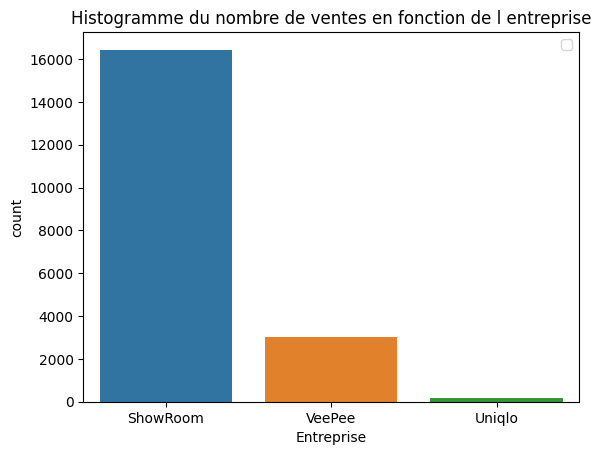

In [117]:
# Analyse de la distribution des données par entreprises

sns.countplot(x="company", data=df_vetements);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre de ventes en fonction de l entreprise');

# a rectifier quand j'aurai boucler sur plus de pages. uniqlo, vinted, spartoo sont inexistants
# ce graphique n'est pas intéressant d'un point de vue analyse mais me permet de visualiser mes proportions de source de données

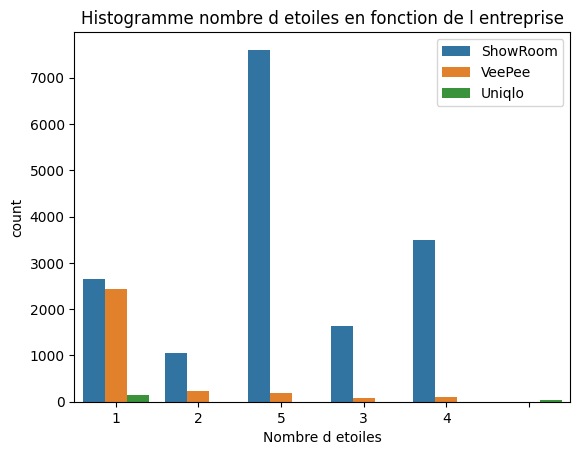

In [118]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="star", hue='company', data=df_vetements)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme nombre d etoiles en fonction de l entreprise');

# a rectifier soit en normalisant, soit en rajoutant le même nombre de données

In [ ]:
# évolution de la moyenne d'étoiles par entreprises, par an

In [ ]:
# répartition des étoiles par type de catégorie par entreprises (text mining)

In [ ]:
# évolution du nombre de réponse faites au client par entreprises, par an (à lire avec évolution de la moyenne)

### 1.3 Exploitation des données